# 运行时替换

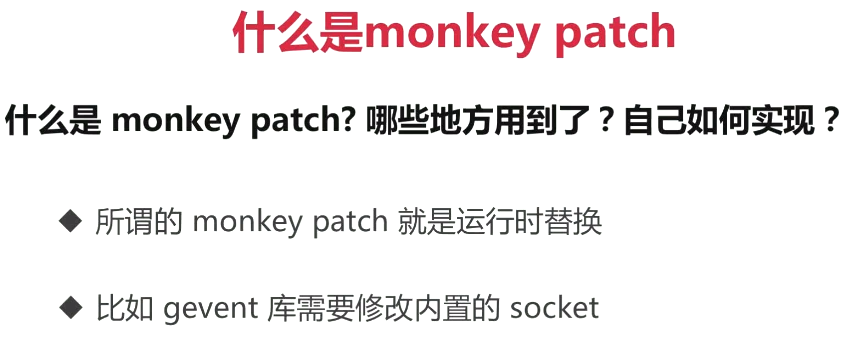

In [1]:
import socket
socket.socket

socket.socket

In [2]:
from gevent import monkey
monkey.patch_socket()
socket.socket

gevent._socket3.socket

---
---
---

In [13]:
a = [1, 2, 3]
b = [1, 2, 3]

In [14]:
a is b, a == b

(False, True)

---
---
---

In [8]:
10/4, 10//4

(2.5, 2)

In [10]:
a, b, *rest = range(10)
a, b, rest

(0, 1, [2, 3, 4, 5, 6, 7, 8, 9])

---
---
---

In [16]:
def hello(name: str) -> str:
    return 'hello' + name

hello('li')

'helloli'

---
---
---

In [19]:
class Base():
    def hello(self):
        print('hello')

class A(Base):
    # 2
    def hello(self):
        return super(A, self).hello()
    
class B(Base):
    # 3
    def hello(self):
        return super().hello()

A().hello()
B().hello()              

hello
hello


---
---
---

In [21]:
# 防止参数顺序搞混
def add(a, b, *, c):
    return a + b + c

print(add(1, 2, c=3))

6


---
---
---

In [26]:
def fun1(*args):
    for i, j in enumerate(args):
        print(i, j)

def fun2(**kwargs):
    for k, v in kwargs.items():
        print(k,'=', v)        
    
fun1('a', 'b', 'c')
fun1(*['a', 'b', 'c'])
fun2(a=1, b=2, c=3)
fun2(**dict(a=1, b=2, c=3))

0 a
1 b
2 c
0 a
1 b
2 c
a = 1
b = 2
c = 3
a = 1
b = 2
c = 3


---
---
---

# 单元测试

In [29]:
def binary_search(array, target):
    if not array:
        return -1
    beg, end = 0, len(array)
    while beg < end:
        mid = beg + (end - beg) // 2
        if array[mid] == target:
            return mid
        elif array[mid] > target:
            end = mid
        else:
            beg = mid + 1
    return -1

# 自动找test函数
def test():
    """
    如何设计测试用例：
    - 正常值功能测试
    - 边界值---最大最小最左最右值
    - 异常值 None，null，非法值
    """
    # 正常值，包含有和无两种结果
    assert binary_search([0, 1, 2, 3, 4, 5], 1) == 1
    assert binary_search([0, 1, 2, 3, 4, 5], 6) == -1
    assert binary_search([0, 1, 2, 3, 4, 5], -1) == -1
    
    # 边界值
    assert binary_search([0, 1, 2, 3, 4, 5], 0) == 0
    assert binary_search([0, 1, 2, 3, 4, 5], 5) == 5
    assert binary_search([0], 0) == 0
    
    # 异常值
    assert binary_search([], 1) == -1
    
# pip install pytest
# pytest 3.1_language_feature.py

In [38]:
!pytest 3_1_language_feature.py

============================= test session starts =============================
platform win32 -- Python 3.6.5, pytest-3.5.1, py-1.5.3, pluggy-0.6.0
rootdir: F:\Learn-for-life\Python_Interview_backend\Python Interview(Backend), inifile:
plugins: remotedata-0.2.1, openfiles-0.3.0, doctestplus-0.1.3, arraydiff-0.2
collected 1 item

3_1_language_feature.py .                                                [100%]

========================== 1 passed in 0.02 seconds ===========================


---
---
---

In [45]:
import collections
c = collections.Counter('abcab')
print(c['a'])
print(c)
print(c.most_common)

2
Counter({'a': 2, 'b': 2, 'c': 1})
<bound method Counter.most_common of Counter({'a': 2, 'b': 2, 'c': 1})>


In [46]:
od = collections.OrderedDict()
od['c'] = 'c'
od['a'] = 'a'
od['b'] = 'b'
od

OrderedDict([('c', 'c'), ('a', 'a'), ('b', 'b')])

---
---
---

# LRU CACHE

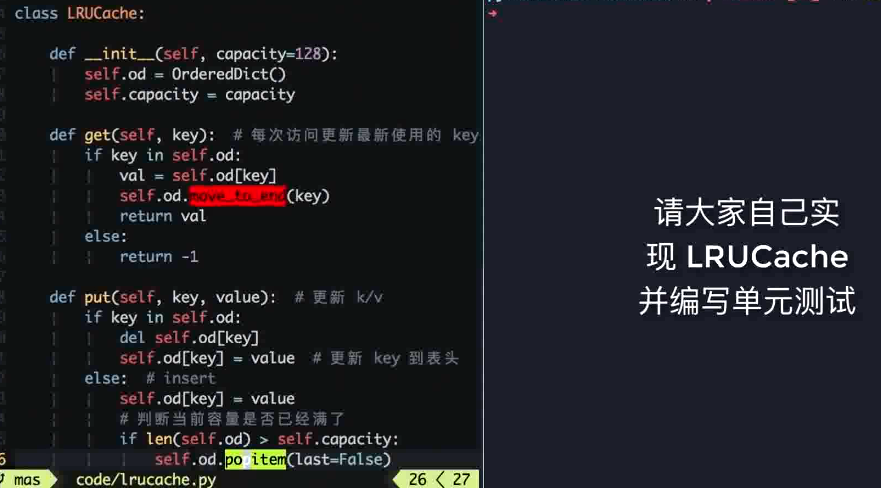

---
---
---

# classmethod & staticmethod

In [59]:
class P:
    country = 'China'
    
    def __init__(self, name):
        self.name = name
    
    @classmethod
    def pp(cls):
        print(cls.country)
    
    @staticmethod
    def pe(name: str, name1: str) -> str:
        print(name + name1)

P('li').pp()
P('lii').pe('li', 'bo')

China
libo


---
---
---

# Metaclass

In [80]:
class X:
    a = 1

def hello(n):
    print(n)
    print(1)
    
Y = type('z', (object,), dict(a=1, hello=hello))

In [84]:
Y().hello()

1


In [86]:
class LowercaseMeta(type):
    def __new__(mcs, name, bases, attrs):
        lower_attrs = {}
        for k, v in attrs.items():
            # if not magic functions
            if not k.startswith('__'):
                lower_attrs[k.lower()] = v
            else:
                lower_attrs[k] = v
        return type.__new__(mcs, name, bases, lower_attrs)

class LowercaseClass(metaclass=LowercaseMeta):
    BAR = True
    
    def HELLO(self):
        print('hello')
    
print(dir(LowercaseClass))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bar', 'hello']


---
---
---

# Decorator

In [94]:
import time

def timer(test_real):  # 5
    def test_to(pa):
        start = time.time()
        test_real(pa)
        stop = time.time()
        print(stop - start)
    
    return test_to

@timer
def test(pa):
    time.sleep(0.1)
    print("test is running!")

# @timer : test = timer(test)

test(1)  # 7

test is running!
0.1007394790649414


In [2]:
import time

class LogTime:
    def __call__(self, func):
        def _log(*args, **kwargs):
            beg = time.time()
            res = func(*args, **kwargs)
            print(f'use time: {time.time() - beg}')
            return res
        return _log
    
@LogTime()
def m():
    time.sleep(1)

m() 

use time: 1.0002949237823486


---
---
---

# 单例模式

In [4]:
class Singleton:
    def __new__(cls, *args, **kwargs):
        if not hasattr(cls, '_instance'):
            _instance = super().__new__(cls, *args, **kwargs)
            cls._instance = _instance
        return cls._instance

class My(Singleton):
    pass

c1 = My()
c2 = My()
c1 is c2, id(c1) == id(c2)

(True, True)

# 适配器模式

In [7]:
class Dog:
    def __init__(self):
        self.name = 'dog'

    def bark(self):
        return 'wang'


class Cat:
    def __init__(self):
        self.name = 'cat'

    def meow(self):
        return 'miao'

class Adapter:
    def __init__(self, obj, **kwargs):
        self.obj = obj
        self.__dict__.update(kwargs)

    def __getattr__(self, item):
        return getattr(self.obj, item)

objects = []
dog = Dog()
objects.append(Adapter(dog, make_noise=dog.bark))
cat = Cat()
objects.append(Adapter(cat, make_noise=cat.meow))

for obj in objects:
    print(f'A {obj.name} goes {obj.make_noise()}')

A dog goes wang
A cat goes miao


# 观察者模式

In [19]:
# 发布订阅模式--观察者模式

class Publisher:  # 发布者
    def __init__(self):
        self.observers = []   # 观察者

    def add(self, observer):  # 加入观察者
        if observer not in self.observers:
            self.observers.append(observer)
        else:
            print(f'failed to add: {observer}')

    def remove(self, observer):  # 移除观察者
        try:
            self.observers.remove(observer)
        except ValueError:
            print(f'failed to remove {observer}')

    def notify(self):  # 调用观察者的回调
        [i.notify_by(self) for i in self.observers]


class Formatter(Publisher):
    def __init__(self, name):
        super().__init__()
        self.name = name
        self._data = 0

    @property
    def data(self):
        return self._data

    @data.setter
    def data(self, new_value):
        self._data = int(new_value)
        self.notify()  # data 在被合法赋值以后会执行notify

class BinaryFormatter:
    """订阅者"""
    def notify_by(self, publisher):
        print(f'{type(self).__name__}: '
              f'"{publisher.name}" has now bin data = {bin(publisher.data)}')

df = Formatter('formatter')  # 发布者
bf = BinaryFormatter()  # 订阅者
df.add(bf)  # 添加订阅者
df.data = 3  # 设置的时候调用订阅者的·notify_by·

BinaryFormatter: "formatter" has now bin data = 0b11


# 策略模式

In [28]:
class Order:
    def __init__(self, price, discount_strategy=None):
        self.price = price
        self.discount_strategy = discount_strategy

    def price_after_discount(self):
        if self.discount_strategy:
            discount = self.discount_strategy(self)
        else:
            discount = 0
        return self.price - discount

    def __repr__(self):
        return f'price: {self.price},' \
               f' price after discount: {self.price_after_discount()}'

def ten_percent_discount(order):
    return order.price * 0.10


def on_sale_discount(order):
    return order.price * 0.25 + 20

if __name__ == '__main__':
    order0 = Order(100)
    order1 = Order(100, discount_strategy=ten_percent_discount)
    order2 = Order(100, discount_strategy=on_sale_discount)
    print(order0)
    print(order1)
    print(order2)

price: 100, price after discount: 100
price: 100, price after discount: 90.0
price: 100, price after discount: 55.0


---
---
---

# HTTP编程

In [2]:
import socket

s = socket.socket()
s.connect(('www.baidu.com', 80))

http = b'GET / HTTP/1.1\r\nHost: www.baidu.com\r\n\r\n'
s.sendall(http)
print(s.recv(1024))
s.close()

b'HTTP/1.1 200 OK\r\nAccept-Ranges: bytes\r\nCache-Control: no-cache\r\nConnection: Keep-Alive\r\nContent-Length: 14615\r\nContent-Type: text/html\r\nDate: Thu, 18 Apr 2019 09:47:26 GMT\r\nEtag: "5cac0cfb-3917"\r\nLast-Modified: Tue, 09 Apr 2019 03:09:47 GMT\r\nP3p: CP=" OTI DSP COR IVA OUR IND COM "\r\nPragma: no-cache\r\nServer: BWS/1.1\r\nSet-Cookie: BAIDUID=C9C5452F76CBC7FD5E9E5A12CB147E46:FG=1; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com\r\nSet-Cookie: BIDUPSID=C9C5452F76CBC7FD5E9E5A12CB147E46; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com\r\nSet-Cookie: PSTM=1555580846; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com\r\nVary: Accept-Encoding\r\nX-Ua-Compatible: IE=Edge,chrome=1\r\n\r\n<!DOCTYPE html><!--STATUS OK-->\r\n<html>\r\n<head>\r\n\t<meta http-equiv="content-type" content="text/html;charset=utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge">\r\n\t<